In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
#Filters warnings
from warnings import filterwarnings 

In [2]:
#Loading file into Path
data = Path('csv/frmgham2.csv')
#Reading data file
data_df = pd.read_csv(data)
data_df.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


In [3]:
# Counting our participants using nunique
data_df['RANDID'].nunique()

#Filtering data for the columns listed below
data_df = data_df[['RANDID', 'SEX', 'TOTCHOL', 'AGE','CURSMOKE',
       'CIGPDAY',  'educ','PREVCHD', 'PERIOD', 'BMI']]

#Dropping data rows containing NaN values
data_df = data_df.dropna()
data_df.head()


,RANDID,SEX,TOTCHOL,AGE,CURSMOKE,CIGPDAY,educ,PREVCHD,PERIOD,BMI
0,2448,1,195.0,39,0,0.0,4.0,0,1,26.97
2,6238,2,250.0,46,0,0.0,2.0,0,1,28.73
3,6238,2,260.0,52,0,0.0,2.0,0,2,29.43
4,6238,2,237.0,58,0,0.0,2.0,0,3,28.50
5,9428,1,245.0,48,1,20.0,1.0,0,1,25.34


In [4]:
#Grouping dataframe by ID to identify periods
databyperiod = data_df.groupby('RANDID').count()
databyperiod.head()

,SEX,TOTCHOL,AGE,CURSMOKE,CIGPDAY,educ,PREVCHD,PERIOD,BMI
RANDID,,,,,,,,,
2448,1,1,1,1,1,1,1,1,1
6238,3,3,3,3,3,3,3,3,3
9428,2,2,2,2,2,2,2,2,2
10552,2,2,2,2,2,2,2,2,2
11252,2,2,2,2,2,2,2,2,2


In [5]:
#Filtering our participants into list only those who completed all 3 periods of the study 
nonull = databyperiod.loc[databyperiod['PERIOD'] == 3, :]
#Assigning index list to a variable
column_ID = nonull.index
#Initialzing List
column_list = []
#Running through for loop of column_ID values to append IDs to column_list
for ID in column_ID: 
    column_list.append(ID)

print(column_ID)


Index([   6238,   11263,   14367,   16365,   23727,   24721,   33077,   34689,
         36459,   40435,
       ...
       9951694, 9961615, 9964282, 9967157, 9969773, 9973350, 9978986, 9982118,
       9990894, 9998212],
      dtype='int64', name='RANDID', length=2754)


In [6]:
#Initiliazing New_data_df as an object
new_data_df = pd.DataFrame()


#Running for loop to select each row of data that matched the column list
for ID in column_list:
    filtered_df =  data_df.loc[data_df['RANDID'] == ID, :]

    #Concated the data frame arg 1 is where you want to store it and arg2 is where you want the data from 
    new_data_df = pd.concat([new_data_df, filtered_df])

new_data_df.head()


,RANDID,SEX,TOTCHOL,AGE,CURSMOKE,CIGPDAY,educ,PREVCHD,PERIOD,BMI
2,6238,2,250.0,46,0,0.0,2.0,0,1,28.73
3,6238,2,260.0,52,0,0.0,2.0,0,2,29.43
4,6238,2,237.0,58,0,0.0,2.0,0,3,28.50
12,11263,2,228.0,43,0,0.0,2.0,0,1,30.30
13,11263,2,230.0,49,0,0.0,2.0,0,2,31.36


In [7]:
#Renaming Columns 
new_data_df = new_data_df.rename(columns={
        "RANDID" : "ID",
        "TOTCHOL" : "TOTAL CHOLESTROL",
        "CURSMOKE" : "SMOKING STATUS",
        "CIGPDAY" : "CIGS PER DAY",
        "educ" : "EDUCATION",
        "PREVCHD" : "PREVALENT CHD"
                                }                                 
                                 )

In [8]:
#Replacing values for sex, prevalent CHD, and smoking status to make it more readable
new_data_df['SEX'] = np.where(new_data_df['SEX'] == 1, 'M', 'F')
new_data_df['SMOKING STATUS'] = np.where(new_data_df['SMOKING STATUS'] == 0, 'NO', 'YES')
new_data_df['PREVALENT CHD'] = np.where(new_data_df['PREVALENT CHD'] == 0, 'NO', 'YES')
new_data_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
2,6238,F,250.0,46,NO,0.0,2.0,NO,1,28.73
3,6238,F,260.0,52,NO,0.0,2.0,NO,2,29.43
4,6238,F,237.0,58,NO,0.0,2.0,NO,3,28.50
12,11263,F,228.0,43,NO,0.0,2.0,NO,1,30.30
13,11263,F,230.0,49,NO,0.0,2.0,NO,2,31.36


In [9]:
#Converting CIGS PER DAY & EDUCATION to integers
CIGS_PER_DAY = new_data_df['CIGS PER DAY'].astype('Int64')
new_data_df['CIGS PER DAY'] = CIGS_PER_DAY.values
EDUCATION = new_data_df['EDUCATION'].astype('Int64')
new_data_df['EDUCATION'] = EDUCATION.values

new_data_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
2,6238,F,250.0,46,NO,0,2,NO,1,28.73
3,6238,F,260.0,52,NO,0,2,NO,2,29.43
4,6238,F,237.0,58,NO,0,2,NO,3,28.50
12,11263,F,228.0,43,NO,0,2,NO,1,30.30
13,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [10]:
#Saving cleaned data into a new csv file 
new_data_df.to_csv("clean_data.csv", index = False)

In [11]:
#Loading file into Path
data = Path('csv/clean_data.csv')
#Reading data file
data_df = pd.read_csv(data)
data_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


# Section 1: General Trends 

# Descriptive Stats

In [12]:
#Getting general info of the dataframe including number of data entries and data types 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8262 entries, 0 to 8261
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8262 non-null   int64  
 1   SEX               8262 non-null   object 
 2   TOTAL CHOLESTROL  8262 non-null   float64
 3   AGE               8262 non-null   int64  
 4   SMOKING STATUS    8262 non-null   object 
 5   CIGS PER DAY      8262 non-null   int64  
 6   EDUCATION         8262 non-null   int64  
 7   PREVALENT CHD     8262 non-null   object 
 8   PERIOD            8262 non-null   int64  
 9   BMI               8262 non-null   float64
dtypes: float64(2), int64(5), object(3)
memory usage: 645.6+ KB


## We will be looking at period 1 and 3 data (beginning and end) of study

In [13]:
#Filter Data for Period 1 
period_1_data = data_df.loc[data_df['PERIOD']==1, :]
#Filter Data for Period 3 
period_3_data = data_df.loc[data_df['PERIOD']==3, :]

In [14]:
#Generating a general statistical table of all data for period 1 adn 3
data_1_summary = period_1_data.describe()
data_3_summary = period_3_data.describe()
print(data_1_summary)
print(data_3_summary)

                 ID  TOTAL CHOLESTROL          AGE  CIGS PER DAY    EDUCATION  \
count  2.754000e+03       2754.000000  2754.000000   2754.000000  2754.000000   
mean   5.017015e+06        235.058460    48.649237      8.498911     2.015251   
std    2.893404e+06         43.757461     8.288898     11.540395     1.031885   
min    6.238000e+03        113.000000    32.000000      0.000000     1.000000   
25%    2.509674e+06        204.000000    42.000000      0.000000     1.000000   
50%    5.016956e+06        232.000000    48.000000      0.000000     2.000000   
75%    7.479796e+06        261.000000    55.000000     20.000000     3.000000   
max    9.998212e+06        464.000000    70.000000     70.000000     4.000000   

       PERIOD          BMI  
count  2754.0  2754.000000  
mean      1.0    25.657876  
std       0.0     3.927359  
min       1.0    15.540000  
25%       1.0    23.050000  
50%       1.0    25.260000  
75%       1.0    27.800000  
max       1.0    56.800000  
         

In [15]:
titles = data_df.columns
print(titles)

Index(['ID', 'SEX', 'TOTAL CHOLESTROL', 'AGE', 'SMOKING STATUS',
       'CIGS PER DAY', 'EDUCATION', 'PREVALENT CHD', 'PERIOD', 'BMI'],
      dtype='object')


In [16]:
print("Period 1 stats:")
for title in titles:
    try:
        print(f"The median for {title} is {period_1_data[title].median()}")
    except:
        print(f"{title} is not numerical data!")

Period 1 stats:
The median for ID is 5016956.0
SEX is not numerical data!
The median for TOTAL CHOLESTROL is 232.0
The median for AGE is 48.0
SMOKING STATUS is not numerical data!
The median for CIGS PER DAY is 0.0
The median for EDUCATION is 2.0
PREVALENT CHD is not numerical data!
The median for PERIOD is 1.0
The median for BMI is 25.26


In [17]:
for title in titles:
    try:
        print(f"The median for {title} is {period_3_data[title].median()}")
    except:
        print(f"{title} is not numerical data!")

The median for ID is 5016956.0
SEX is not numerical data!
The median for TOTAL CHOLESTROL is 234.0
The median for AGE is 60.0
SMOKING STATUS is not numerical data!
The median for CIGS PER DAY is 0.0
The median for EDUCATION is 2.0
PREVALENT CHD is not numerical data!
The median for PERIOD is 3.0
The median for BMI is 25.445


# Section 1B: Hypothesis 1 - There is no correlation between Smoking status and Prevalent CHD 

In [18]:
#Filter Data for Period 1 
period_1_data = data_df.loc[(data_df['PERIOD']==1) & (data_df['PREVALENT CHD']=='YES'), :]
#Filter Data for Period 3 
period_3_data = data_df.loc[(data_df['PERIOD']==3) & (data_df['PREVALENT CHD']=='YES'), :]

In [19]:
#Grouping Data into Smoking Status and Prevalent CHD 
period_1_data_gb = period_1_data.groupby(['SMOKING STATUS', 'PREVALENT CHD']).count()
#Keeping the count of smoking status prevalent CHD cases 
period_1_data_gb = pd.DataFrame(period_1_data_gb['ID'])
# Reset the index to make the groupby columns regular columns
period_1_data_gb = period_1_data_gb.reset_index()
# Pivot the DataFrame to create a more readable table for plotting
pivot_table_1 = period_1_data_gb.pivot(index='SMOKING STATUS', columns='PREVALENT CHD', values='ID')
pivot_table_1

PREVALENT CHD,YES
SMOKING STATUS,
NO,40
YES,24


[Text(0, 0, 'Non Smoker'), Text(1, 0, 'Smoker')]

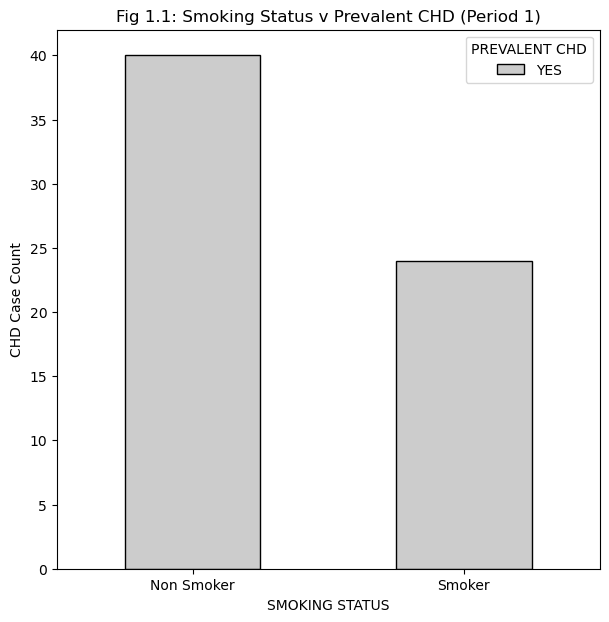

In [20]:
#List of xtick labels 
xtick_labels = ['Non Smoker', 'Smoker']

#Setting parameters and plotten the bar graph
period_1_plot = pivot_table_1.plot.bar(stacked=True, figsize = (7,7), ylabel = "CHD Case Count", 
                                       title = "Fig 1.1: Smoking Status v Prevalent CHD (Period 1)", color = '0.8',
                                       edgecolor = 'black', rot = 0
                                       )

#Changing xtick label to reflect smoking status 
period_1_plot.set_xticklabels(xtick_labels)

# Chi-Squared Test (Period 1 Data)

In [21]:
#Df of Observed Vlaues 
expected_values = pivot_table_1.copy()
#Creating a Df of expected value 
rows_sum = pivot_table_1.sum(axis=1)
colums_sum = pivot_table_1.sum(axis=0)

#Calculating the expected values
expected_values.iloc[0, 0] = (rows_sum[0]*colums_sum[0])/(sum(rows_sum))
expected_values.iloc[1, 0] = (rows_sum[1]*colums_sum[0])/(sum(rows_sum))
expected_values

#Creating a table with the Observed and Expected values 
chi_square_table = pd.DataFrame()
chi_square_table['Observed'] = pivot_table_1
chi_square_table['Expected'] = expected_values['YES']
chi_square_table

,Observed,Expected
SMOKING STATUS,,
NO,40,40
YES,24,24


In [22]:
#Determing the critical vlaue 
critical_value = st.chi2.ppf(q = 0.95, df = 1)
print(f"This is the critical value {critical_value}")

This is the critical value 3.841458820694124


In [23]:
# Run the chi square test with stats.chisquare()
st.chisquare(chi_square_table['Observed'], chi_square_table['Expected'])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

# Conclusion 

Since the chi square value of 0 does not exceed the critical value of 3.84, we conclude that the results are statistically not significant.

In [24]:
#Grouping Data into Smoking Status and Prevalent CHD 
period_3_data_gb = period_3_data.groupby(['SMOKING STATUS', 'PREVALENT CHD']).count()
#Keeping the count of smoking status prevalent CHD cases 
period_3_data_gb = pd.DataFrame(period_3_data_gb['ID'])
# Reset the index to make the groupby columns regular columns
period_3_data_gb = period_3_data_gb.reset_index()
# Pivot the DataFrame to create a more readable table for plotting
pivot_table_2 = period_3_data_gb.pivot(index='SMOKING STATUS', columns='PREVALENT CHD', values='ID')
pivot_table_2

PREVALENT CHD,YES
SMOKING STATUS,
NO,219
YES,81


[Text(0, 0, 'Non Smoker'), Text(1, 0, 'Smoker')]

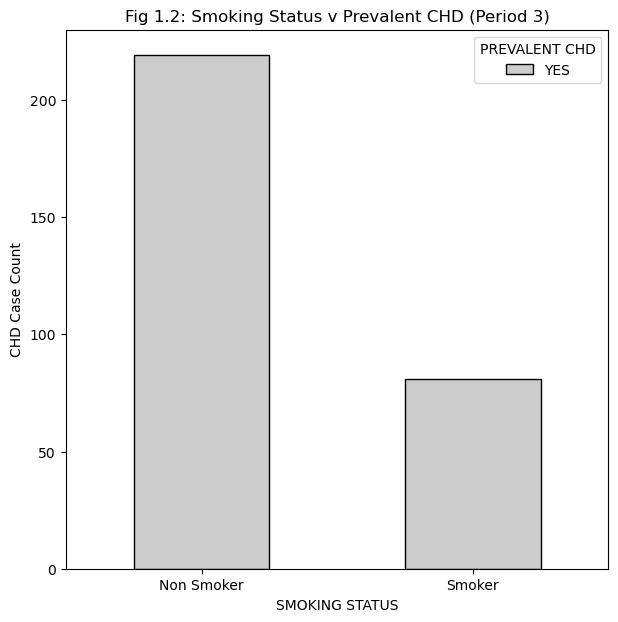

In [25]:
#Setting parameters and plotting the bar graph
period_3_plot = pivot_table_2.plot.bar(stacked=True, figsize = (7,7), ylabel = "CHD Case Count", 
                                       title = "Fig 1.2: Smoking Status v Prevalent CHD (Period 3)", color = '0.8',
                                       edgecolor = 'black', rot = 0
                                       )

#Setting x tick labels by 
period_3_plot.set_xticklabels(xtick_labels)

# Chi-Squared Test (Period 3 Data)

In [26]:
#Df of Observed Vlaues 
expected_values = pivot_table_2.copy()
#Creating a Df of expected value 
rows_sum = pivot_table_2.sum(axis=1)
colums_sum = pivot_table_2.sum(axis=0)

#Calculating the expected values
expected_values.iloc[0, 0] = (rows_sum[0]*colums_sum[0])/(sum(rows_sum))
expected_values.iloc[1, 0] = (rows_sum[1]*colums_sum[0])/(sum(rows_sum))
expected_values

#Creating a table with the Observed and Expected values 
chi_square_table = pd.DataFrame()
chi_square_table['Observed'] = pivot_table_2
chi_square_table['Expected'] = expected_values['YES']
chi_square_table

,Observed,Expected
SMOKING STATUS,,
NO,219,219
YES,81,81


In [27]:
#Determing the critical vlaue 
critical_value = st.chi2.ppf(q = 0.95, df = 1)
print(f"This is the critical value {critical_value}")

This is the critical value 3.841458820694124


In [28]:
# Run the chi square test with stats.chisquare()
st.chisquare(chi_square_table['Observed'], chi_square_table['Expected'])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

# Conclusion 

Since the chi square value of 0 does not exceed the critical value of 3.84, we conclude that the results are statistically not significant.

Hypothesis 2: There is a correlation between Age, Smoking Status and Prevalent CHD 

In [29]:
# Create the bins for the age groups
bins = [25, 35, 45, 55, 65, 75, 85]

# Create the names labels
age_labels = ["25-35", "36-45", "46-55", "56-65", "66-75", "76-85"]

# Slicing the data and place it into bins
period_1_data["AGE GROUPS"] = pd.cut(period_1_data["AGE"], 
                                              bins, labels=age_labels, 
                                              include_lowest=True)

period_1_data

/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_40121/948398095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_1_data["AGE GROUPS"] = pd.cut(period_1_data["AGE"],


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,AGE GROUPS
54,68397,M,227.0,40,NO,0,3,YES,1,23.62,36-45
177,208566,M,288.0,52,YES,20,3,YES,1,22.70,46-55
312,428306,M,265.0,41,YES,20,4,YES,1,23.35,36-45
420,556045,F,194.0,62,NO,0,1,YES,1,30.23,56-65
426,571377,F,320.0,58,NO,0,1,YES,1,31.77,56-65
...,...,...,...,...,...,...,...,...,...,...,...
8058,9746116,F,186.0,56,YES,10,4,YES,1,25.81,56-65
8112,9802787,M,218.0,49,NO,0,1,YES,1,25.44,46-55
8142,9838321,M,215.0,51,YES,10,1,YES,1,30.61,46-55
8163,9868819,F,252.0,60,NO,0,1,YES,1,40.23,56-65


In [30]:
#Grouping Data by relavent columns 
age_period_1_gb = pd.DataFrame(period_1_data.groupby(['AGE GROUPS', 'PREVALENT CHD']).count())
age_period_1_gb

,,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PERIOD,BMI
AGE GROUPS,PREVALENT CHD,,,,,,,,,
25-35,YES,0,0,0,0,0,0,0,0,0
36-45,YES,9,9,9,9,9,9,9,9,9
46-55,YES,21,21,21,21,21,21,21,21,21
56-65,YES,32,32,32,32,32,32,32,32,32
66-75,YES,2,2,2,2,2,2,2,2,2
76-85,YES,0,0,0,0,0,0,0,0,0


In [31]:
# Pivot the data to create a table with 'AGE GROUPS' as rows, 'PREVALENT CHD' as columns, and 'ID(Count)' as values
pivot_table_3 =age_period_1_gb.pivot_table(index='AGE GROUPS', columns=['PREVALENT CHD'], values='ID')
pivot_table_3 = pd.DataFrame(pivot_table_3)
pivot_table_3 = pivot_table_3.drop(['25-35'])
pivot_table_3

PREVALENT CHD,YES
AGE GROUPS,
36-45,9
46-55,21
56-65,32
66-75,2
76-85,0


In [32]:
#Getting the sum of the column
colums_sum = pivot_table_3.sum(axis=0)
#List of prevalent 
count_PREV_CHDS = []

#Creating an ampty dataframe
age_CHD = pd.DataFrame()
#Ierates through each row of data
for x in range(0,5): 
    #Calculate percentage of prevalent CHD cases
    count_PREV_CHD = round((((pivot_table_3.iloc[x,0])/(colums_sum[0]))*100),2)
    #Appens percentages to a list
    count_PREV_CHDS.append(count_PREV_CHD)
#Sets list as the values for the Number of prevalent of CHD columns 
age_CHD['PERCENTAGE OF PREVALENT CHD CASES'] = count_PREV_CHDS

#Setting the index value as the data for the age groups column 
age_CHD['AGE GROUPS'] = pivot_table_3.index
age_CHD

,PERCENTAGE OF PREVALENT CHD CASES,AGE GROUPS
0,14.06,36-45
1,32.81,46-55
2,50.00,56-65
3,3.12,66-75
4,0.00,76-85


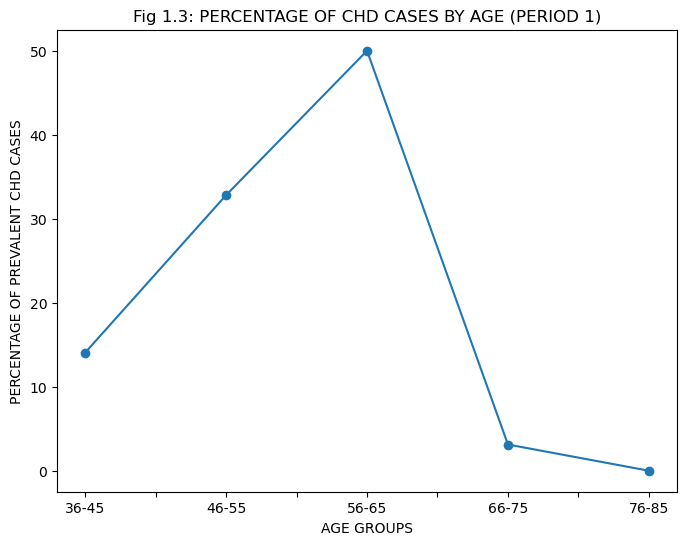

In [33]:
#Creating the plot 
ax = age_CHD.plot(x= 'AGE GROUPS', y=['PERCENTAGE OF PREVALENT CHD CASES'], marker='o', figsize=(8, 6), legend=False)
#Setting Label for axises 
ax.set_ylabel('PERCENTAGE OF PREVALENT CHD CASES')
ax.set_title('Fig 1.3: PERCENTAGE OF CHD CASES BY AGE (PERIOD 1)')
plt.show()

In [34]:
# Slicing the data and place it into bins
period_3_data["AGE GROUPS"] = pd.cut(period_3_data["AGE"], 
                                              bins, labels=age_labels, 
                                              include_lowest=True)

period_3_data.head()

/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_40121/1562719307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  period_3_data["AGE GROUPS"] = pd.cut(period_3_data["AGE"],


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,AGE GROUPS
56,68397,M,320.0,53,YES,8,3,YES,3,22.78,46-55
101,134914,F,180.0,52,YES,40,4,YES,3,22.36,46-55
155,199546,F,228.0,73,NO,0,1,YES,3,28.69,66-75
179,208566,M,223.0,64,NO,0,3,YES,3,22.11,56-65
194,228129,F,274.0,72,NO,0,3,YES,3,27.59,66-75


In [35]:
#Grouping Data by relavent columns 
age_period_3_gb = pd.DataFrame(period_3_data.groupby(['AGE GROUPS', 'PREVALENT CHD']).count())
age_period_3_gb

,,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PERIOD,BMI
AGE GROUPS,PREVALENT CHD,,,,,,,,,
25-35,YES,0,0,0,0,0,0,0,0,0
36-45,YES,0,0,0,0,0,0,0,0,0
46-55,YES,47,47,47,47,47,47,47,47,47
56-65,YES,112,112,112,112,112,112,112,112,112
66-75,YES,123,123,123,123,123,123,123,123,123
76-85,YES,18,18,18,18,18,18,18,18,18


In [36]:
# Pivot the data to create a table with 'AGE GROUPS' as rows, 'SMOKING STATUS' as columns, and 'ID(Count)' as values
pivot_table_4 = age_period_3_gb.pivot_table(index='AGE GROUPS', columns=['PREVALENT CHD'], values='ID')
pivot_table_4 = pd.DataFrame(pivot_table_4)
#Dropping last row of data due all values being zero
pivot_table_4 = pivot_table_4.drop(['25-35', '36-45'])
pivot_table_4

PREVALENT CHD,YES
AGE GROUPS,
46-55,47
56-65,112
66-75,123
76-85,18


In [37]:
#Getting the sum of the column
colums_sum = pivot_table_4.sum(axis=0)
#List of prevalent 
count_PREV_CHDS_3 = []

#Creating an empty data frame
age_CHD_3 = pd.DataFrame()
#Ierates through each row of data
for x in range(0,4): 
    #Calculate percentage of prevalent CHD cases
    count_PREV_CHD_3 = round((((pivot_table_4.iloc[x,0])/(colums_sum[0]))*100),2)
    #Appens percentages to a list
    count_PREV_CHDS_3.append(count_PREV_CHD_3)
#Sets list as the values for the Number of prevalent of CHD columns 
age_CHD_3['PERCENTAGE OF PREVALENT CHD CASES'] = count_PREV_CHDS_3

#Setting the index value as the data for the age groups column 
age_CHD_3['AGE GROUPS'] = pivot_table_4.index
age_CHD_3

,PERCENTAGE OF PREVALENT CHD CASES,AGE GROUPS
0,15.67,46-55
1,37.33,56-65
2,41.00,66-75
3,6.00,76-85


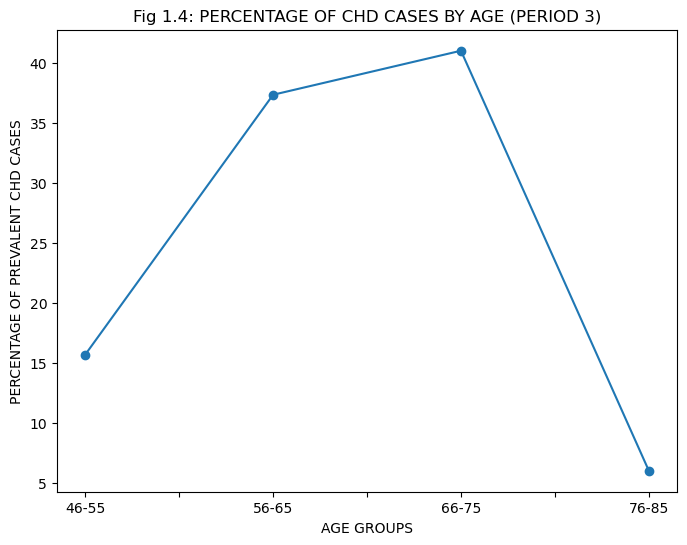

In [38]:
#Creating the plot 
ax = age_CHD_3.plot(x= 'AGE GROUPS', y=['PERCENTAGE OF PREVALENT CHD CASES'], marker='o', figsize=(8, 6), legend=False)
#Setting Label for axises 
ax.set_ylabel('PERCENTAGE OF PREVALENT CHD CASES')
ax.set_title('Fig 1.4: PERCENTAGE OF CHD CASES BY AGE (PERIOD 3)')
plt.show()

# Section 2: Sex and Cholestrol v CHD

In [39]:
# Initializing clean csv file

cleanpath = Path('csv/clean_data.csv')
file = pd.read_csv(cleanpath)
file.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [40]:
# Narrow to relevant columns
sex_df = file[['ID','SEX','PREVALENT CHD','PERIOD']]

# Filter by PREVALENT CHD =='YES'
chd = sex_df.loc[sex_df['PREVALENT CHD']=='YES',:]

# Filter by period 1 and 3 respectively
chd_p1 = chd.loc[chd['PERIOD']==1,:]

chd_p3 = chd.loc[chd['PERIOD']==3,:]

Sex and CHD

In [41]:
#filter by Period == 1

sex_p1 = pd.DataFrame()
sex_p1 = sex_df.loc[sex_df['PERIOD']==1,:]
sex_p1

sex_p1 = sex_p1[['ID','SEX','PREVALENT CHD']]

# Debugging, to make sure data is being filtered correctly.

# Females in Period 1
female_p1 = sex_p1.loc[sex_p1['SEX']=='F',:]
fp1count = female_p1['ID'].count()

# Males in Period 1
male_p1 = sex_p1.loc[sex_p1['SEX']=='M',:]
mp1count = male_p1['ID'].count()

print(f' The female count in period 1 is: {fp1count}, and for male is: {mp1count}')

#Filter data by PREVALENT CHD =='YES'

male_p1_chd= male_p1.loc[male_p1['PREVALENT CHD']=='YES',:]
mp1chdcount1 = male_p1_chd['ID'].count()

female_p1_chd = female_p1.loc[female_p1['PREVALENT CHD']=='YES',:]
fp1chdcount1 = female_p1_chd['ID'].count()

print(f' The female count with CHD in period 1 is: {fp1chdcount1}, and for males is: {mp1chdcount1}')

 The female count in period 1 is: 1546, and for male is: 1208
 The female count with CHD in period 1 is: 25, and for males is: 39


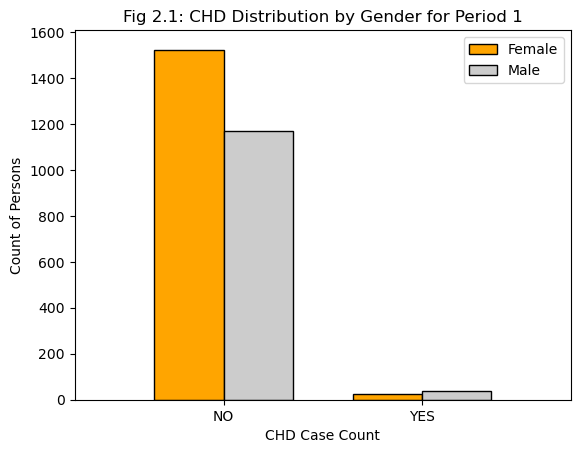

In [42]:
# PERIOD 1 PLOTTING: SEX AND CHD PREVALENCE

yesorno = ['NO','YES']
sexes = np.arange(len(yesorno))

female_axis=female_p1.groupby(['PREVALENT CHD'])['ID'].count()

male_axis= male_p1.groupby(['PREVALENT CHD'])['ID'].count()
    
# Double plotting for both sexes individually

bars_widthz = 0.35

plt.bar(sexes - bars_widthz/2,female_axis,label='Female',color='orange',align='center',edgecolor='black',width=0.35)
plt.bar(sexes + bars_widthz/2,male_axis,label='Male',color='0.80',align='center',edgecolor='black',width=0.35)

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('Fig 2.1: CHD Distribution by Gender for Period 1')
plt.xlabel("CHD Case Count")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_p1['PREVALENT CHD']=='YES').count()+400)
plt.legend()
plt.show()

In [43]:
# Now repeat steps from before but for data when PERIOD == 3 for comparison

# Collect descriptive stats

sex_p3 = pd.DataFrame()
sex_p3 = sex_df.loc[sex_df['PERIOD']==3,:]
sex_p3 = sex_p3[['ID','SEX','PREVALENT CHD']]


female_p3 = sex_p3.loc[sex_p3['SEX']=='F',:]
fp3 = female_p3['ID'].count()

male_p3 = sex_p3.loc[sex_p3['SEX']=='M',:]
mp3 = male_p3['ID'].count()

print(f' The female count in period 3 is: {fp3}, and for males is: {mp3}')

#Split by PREVALENT CHD == 'YES'

male_p3_chd= male_p3.loc[male_p3['PREVALENT CHD']=='YES',:]
mp3chd = male_p3_chd['ID'].count()

female_p3_chd = female_p3.loc[female_p3['PREVALENT CHD']=='YES',:]
fp3chd = female_p3_chd['ID'].count()

print(f' The female count with CHD in period 3 is: {fp3chd}, and for males is {mp3chd}')

 The female count in period 3 is: 1546, and for males is: 1208
 The female count with CHD in period 3 is: 127, and for males is 173


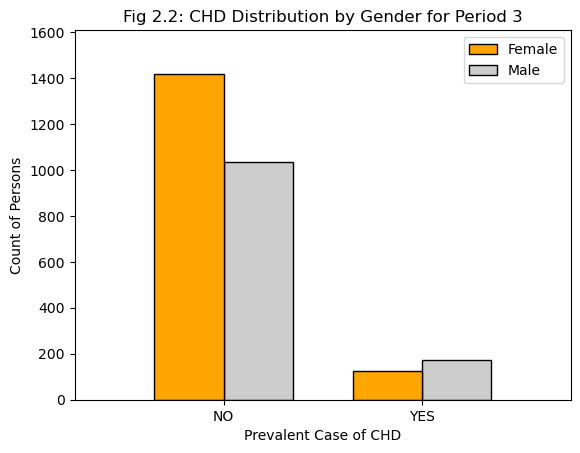

In [44]:
# PERIOD 3 PLOTTING: SEX AND CHD PREVALENCE

sexes = np.arange(len(yesorno))
yesorno = ['NO','YES']

female_axis2=female_p3.groupby(['PREVALENT CHD'])['ID'].count()
female_axis2

male_axis2= male_p3.groupby(['PREVALENT CHD'])['ID'].count()
male_axis2
                
# Double plotting for both sexes individually

bars_width = 0.35

plt.bar(sexes - bars_width/2,female_axis2,label='Female',color='orange',align='center',edgecolor='black',zorder=2, width=0.35)
plt.bar(sexes + bars_width/2,male_axis2,label='Male',color='0.80',align='center',edgecolor='black', width = 0.35)

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('Fig 2.2: CHD Distribution by Gender for Period 3')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_p1['PREVALENT CHD']=='YES').count()+400)
plt.legend()
plt.show()

Sex, Smoking and CHD

In [45]:
# Creating a new dataframe with relevant columns
smoking_df = file[['ID','SEX','SMOKING STATUS','PREVALENT CHD','PERIOD']]
smoking_df.head()

# Split data by Period 1 and Period 3 
smoking_p1 = pd.DataFrame()
smoking_p1 = smoking_df.loc[smoking_df['PERIOD']==1,:]


# Further filter by to only show rows where SMOKING STATUS == 'YES'
smoking_p1 = smoking_p1.loc[smoking_p1['SMOKING STATUS']=='YES',:]
smoking_p1



,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
9,16365,M,YES,NO,1
15,24721,F,YES,NO,1
18,33077,M,YES,NO,1
21,34689,F,YES,NO,1
27,40435,F,YES,NO,1
...,...,...,...,...,...
8223,9939850,F,YES,NO,1
8235,9961615,M,YES,NO,1
8247,9973350,F,YES,NO,1
8250,9978986,F,YES,NO,1


In [46]:
# Debugging, to make sure data is being filtered correctly.


female_smp1 = smoking_p1.loc[smoking_p1['SEX']=='F',:]
female_smp1

male_smp1 = smoking_p1.loc[smoking_p1['SEX']=='M',:]
male_smp1

# #Once again split data further, by PREVALENT CHD (yes or no)

male_smp1_chd= male_smp1.loc[male_smp1['PREVALENT CHD']=='YES',:]
male_smp1_chd

female_smp1_chd = female_smp1.loc[female_smp1['PREVALENT CHD']=='YES',:]
female_smp1_chd


,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
1983,2408348,F,YES,YES,1
3231,3915943,F,YES,YES,1
4575,5610759,F,YES,YES,1
8058,9746116,F,YES,YES,1


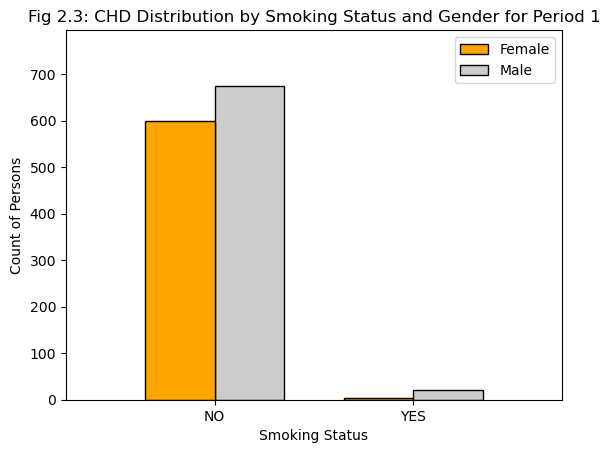

In [47]:
# PERIOD 1 PLOTTING: SMOKING, SEX AND CHD PREVALENCE

female_axis3=female_smp1.groupby(['PREVALENT CHD'])['ID'].count()
female_axis3

male_axis3= male_smp1.groupby(['PREVALENT CHD'])['ID'].count()
male_axis3

sexes = np.arange(len(yesorno))
bars_widthz

# Double plotting for both sexes individually
plt.bar(sexes - bars_widthz/2,female_axis3,label='Female',color='orange',align='center',zorder=2,edgecolor='black', width = 0.35)
plt.bar(sexes + bars_widthz/2,male_axis3,label='Male',color='0.80',align='center',edgecolor='black', width = 0.35)

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('Fig 2.3: CHD Distribution by Smoking Status and Gender for Period 1')
plt.xlabel("Smoking Status")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_smp1['PREVALENT CHD']=='YES').count()+100)
plt.legend()
plt.show()


In [48]:
# SEX, SMOKING AND CHD FOR PERIOD 3

smoking_p3 = pd.DataFrame()
smoking_p3 = smoking_df.loc[smoking_df['PERIOD']==3,:]
smoking_p3

# Filter by SMOKING STATUS == 'YES'

smoking_p3 = smoking_p3.loc[smoking_df['SMOKING STATUS']=='YES',:]
smoking_p3

,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
17,24721,F,YES,NO,3
20,33077,M,YES,NO,3
23,34689,F,YES,NO,3
29,40435,F,YES,NO,3
35,45464,F,YES,NO,3
...,...,...,...,...,...
8207,9920050,F,YES,NO,3
8210,9925133,F,YES,NO,3
8222,9938128,M,YES,NO,3
8237,9961615,M,YES,NO,3


In [49]:
# Debugging, to make sure data is being filtered correctly.


female_smp3 = smoking_p3.loc[smoking_p3['SEX']=='F',:]
female_smp3

male_smp3 = smoking_p3.loc[smoking_p3['SEX']=='M',:]
male_smp3

# #Once again split data further, by PREVALENT CHD (yes or no)

male_smp3_chd= male_smp3.loc[male_smp3['PREVALENT CHD']=='YES',:]
male_smp3_chd

female_smp3_chd = female_smp3.loc[female_smp3['PREVALENT CHD']=='YES',:]
female_smp3_chd.count()

ID                23
SEX               23
SMOKING STATUS    23
PREVALENT CHD     23
PERIOD            23
dtype: int64

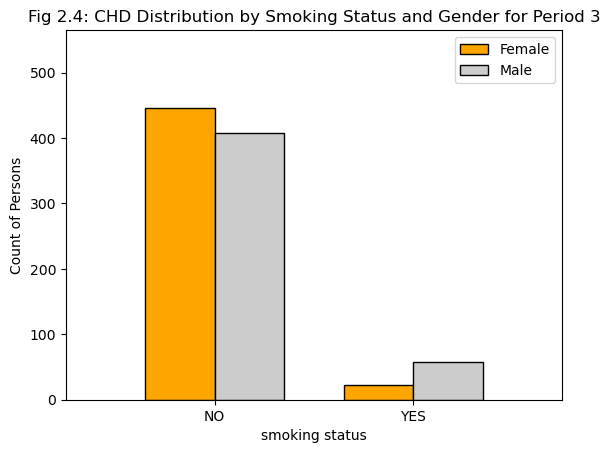

In [50]:
# PERIOD 3 PLOTTING: SMOKING, SEX AND CHD PREVALENCE

female_axis4=female_smp3.groupby(['PREVALENT CHD'])['ID'].count()
female_axis4

male_axis4= male_smp3.groupby(['PREVALENT CHD'])['ID'].count()
male_axis4

sexes = np.arange(len(yesorno))

# Double plotting for both sexes individually
plt.bar(sexes - bars_widthz/2,female_axis4,label='Female',color='orange',align='center',width = 0.35, edgecolor = 'black')
plt.bar(sexes + bars_widthz/2 ,male_axis4,label='Male',color='0.80',align='center', width=0.35, edgecolor = 'black')

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('Fig 2.4: CHD Distribution by Smoking Status and Gender for Period 3')
plt.xlabel('smoking status')
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_smp3['PREVALENT CHD']=='YES').count()+100)
plt.legend()
plt.show()

# Section 2B: Cholestrol Continued 

In [51]:
# Narrow down data set to relevant columns

sex_df = file[['ID','SEX','PREVALENT CHD','PERIOD']]
sex_df

chd = sex_df.loc[sex_df['PREVALENT CHD']=='YES',:]
howmanyparticipants = chd['ID'].count()
print(f' Total count of participants with CHD across all periods: {howmanyparticipants}')

chd_p1 = chd.loc[chd['PERIOD']==1,:]
howmanyinperiod1 = chd_p1['ID'].count()
print(f' Total count in period 1: {howmanyinperiod1} ')

chd_p3 = chd.loc[chd['PERIOD']==3,:]
howmanyin3 = chd_p3['ID'].count()
print(f' Total count in period 3: {howmanyin3}')

 Total count of participants with CHD across all periods: 517
 Total count in period 1: 64 
 Total count in period 3: 300


In [52]:
# CHOLESTROL AND CHD CORRELATION

#Create a new dataframe with relevant columns

chol_df = file[['ID','SEX','TOTAL CHOLESTROL','PREVALENT CHD','SMOKING STATUS','CIGS PER DAY','PERIOD']]
chol_df.head()

,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD
0,6238,F,250.0,NO,NO,0,1
1,6238,F,260.0,NO,NO,0,2
2,6238,F,237.0,NO,NO,0,3
3,11263,F,228.0,NO,NO,0,1
4,11263,F,230.0,NO,NO,0,2


Bin Cholestrol into readable groups [abnormally low, healthy, at risk, abnormally high] 

In [53]:
# CREATING CHOLESTEROL LEVELS 

# < 120 = abnormally low
# 120-200 = healthy
#  200-239 =  at risk
# 240+ = abnormally high

min_chol = chol_df['TOTAL CHOLESTROL'].min()
max_chol = chol_df['TOTAL CHOLESTROL'].max()
print(f' The min cholesterol in the population sample in period 1 is {min_chol} and max cholesterol is {max_chol}')

bins = [0, 119.9,199.9,239,float('inf')]

bin_names = ['abnormally low','healthy','at risk','abnormally high']

# Slicing our data in bins

chol_df['CHOLESTROL LEVEL'] = pd.cut(chol_df['TOTAL CHOLESTROL'],bins,
                                     labels=bin_names,include_lowest=True)

chol_df.head(10)

 The min cholesterol in the population sample in period 1 is 112.0 and max cholesterol is 638.0


/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_40121/1878770007.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chol_df['CHOLESTROL LEVEL'] = pd.cut(chol_df['TOTAL CHOLESTROL'],bins,


,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
0,6238,F,250.0,NO,NO,0,1,abnormally high
1,6238,F,260.0,NO,NO,0,2,abnormally high
2,6238,F,237.0,NO,NO,0,3,at risk
3,11263,F,228.0,NO,NO,0,1,at risk
4,11263,F,230.0,NO,NO,0,2,at risk
5,11263,F,220.0,NO,NO,0,3,at risk
6,14367,M,260.0,NO,NO,0,1,abnormally high
7,14367,M,292.0,NO,NO,0,2,abnormally high
8,14367,M,280.0,NO,NO,0,3,abnormally high
9,16365,M,225.0,NO,YES,30,1,at risk


In [54]:
# Filter by Period 1 only

chol_p1 = chol_df.loc[chol_df['PERIOD']==1,:]
chol_p1

# Filter again by PREVALENCT CHD=='YES'

chol_p1 = chol_p1.loc[chol_p1['PREVALENT CHD']=='YES',:]
chol_p1

,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
54,68397,M,227.0,YES,NO,0,1,at risk
177,208566,M,288.0,YES,YES,20,1,abnormally high
312,428306,M,265.0,YES,YES,20,1,abnormally high
420,556045,F,194.0,YES,NO,0,1,healthy
426,571377,F,320.0,YES,NO,0,1,abnormally high
...,...,...,...,...,...,...,...,...
8058,9746116,F,186.0,YES,YES,10,1,healthy
8112,9802787,M,218.0,YES,NO,0,1,at risk
8142,9838321,M,215.0,YES,YES,10,1,at risk
8163,9868819,F,252.0,YES,NO,0,1,abnormally high


Plot Bar Graph of Cholestrol level Distribution of CHD Participants

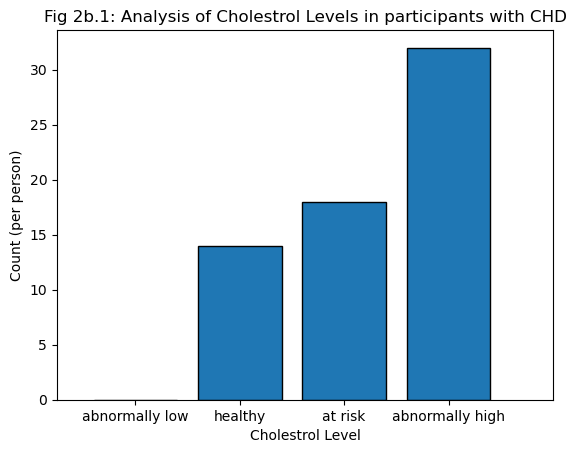

In [55]:
# Plotting Histogram 

cholestrol_yaxis = chol_p1.groupby(['CHOLESTROL LEVEL'])['ID'].count()
cholestrol_yaxis

plt.bar(bin_names,cholestrol_yaxis,align='center',edgecolor='black')

plt.xlabel('Cholestrol Level')
plt.ylabel('Count (per person)')
plt.xlim(-0.75,len(bin_names))
plt.title('Fig 2b.1: Analysis of Cholestrol Levels in participants with CHD')

plt.show()

# CHOLESTROL LEVEL
# abnormally low      0
# healthy            14
# at risk            18
# abnormally high    32

In [56]:
# Filtering participants with CHD by Sex, to view if there's any correlation 

chol_fm = chol_p1.loc[chol_p1['SEX']=='F',:]
chol_fm_count = chol_fm['SEX'].count()
print(f' The total female count with CHD in Period 1 is: {chol_fm_count}')

chol_m = chol_p1.loc[chol_p1['SEX']=='M',:]
chol_m_count = chol_m['SEX'].count()
print(f' The total male count with CHD in Period 1 is: {chol_m_count}')


female_chol_yaxis = chol_fm.groupby(['CHOLESTROL LEVEL'])['ID'].count()
print(f' {female_chol_yaxis} distribution for FEMALES')

male_chol_yaxis = chol_m.groupby(['CHOLESTROL LEVEL'])['ID'].count()
print(f' {male_chol_yaxis} distribution for MALES')

 The total female count with CHD in Period 1 is: 25
 The total male count with CHD in Period 1 is: 39
 CHOLESTROL LEVEL
abnormally low      0
healthy             5
at risk             6
abnormally high    14
Name: ID, dtype: int64 distribution for FEMALES
 CHOLESTROL LEVEL
abnormally low      0
healthy             9
at risk            12
abnormally high    18
Name: ID, dtype: int64 distribution for MALES


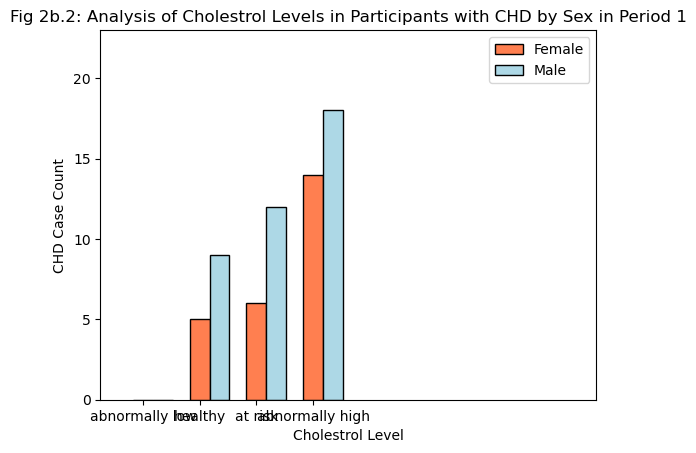

In [57]:
# Plotting Histogram of Cholestrol levels in relation to CHD prevalence BY SEX
bar_width = 0.35
x1 = range(len(bin_names))
x2 = [x + bar_width for x in x1]

plt.bar(x1,female_chol_yaxis,width=bar_width, align='center',label = 'Female',color='coral',edgecolor='black')
plt.bar(x2,male_chol_yaxis,width=bar_width, align='center',label = 'Male',color='lightblue',edgecolor='black')
plt.xlabel('Cholestrol Level')
plt.ylabel('CHD Case Count')
plt.xlim(-0.75,len(bin_names)+4)
plt.ylim(0, max(max(female_chol_yaxis), max(male_chol_yaxis)) + 5)

tick_pla = [value for value in x1]
plt.xticks(tick_pla, bin_names)

plt.title('Fig 2b.2: Analysis of Cholestrol Levels in Participants with CHD by Sex in Period 1')
plt.legend()
plt.show()

Finding: 'abnormally high' cholesterol level contained largest count of population sample. Male's also had higher counts in all cholesterol levels, 'abnormally low' being the exception.

In [58]:
# Creating pivot table to better analyse relationship between CHD, Cholestrol and Sex

cholestrol_table = pd.DataFrame()
cholestrol_table = chol_p1.groupby(['SEX','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
cholestrol_table = cholestrol_table.reset_index() 
cholestrol_table

# Create Pivot Table with above
cholestrol_pivot = cholestrol_table.pivot(index = 'CHOLESTROL LEVEL', columns='SEX',values='PREVALENT CHD')
cholestrol_pivot

SEX,F,M
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,5,9
at risk,6,12
abnormally high,14,18


Analysing CHD, CHOLESTROL AND SMOKING in PERIOD 1

In [59]:
# Creating pivot table for cleaner analysis between CHD, Cholestrol and Smoking status

chol_smoking_table = pd.DataFrame()
chol_smoking_table = chol_p1.groupby(['SMOKING STATUS','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
chol_smoking_table = chol_smoking_table.reset_index() 
chol_smoking_table

# Create Pivot Table with above
chol_smoking_pivot = chol_smoking_table.pivot(index = 'CHOLESTROL LEVEL', columns='SMOKING STATUS',values='PREVALENT CHD')
chol_smoking_pivot

SMOKING STATUS,NO,YES
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,8,6
at risk,12,6
abnormally high,20,12


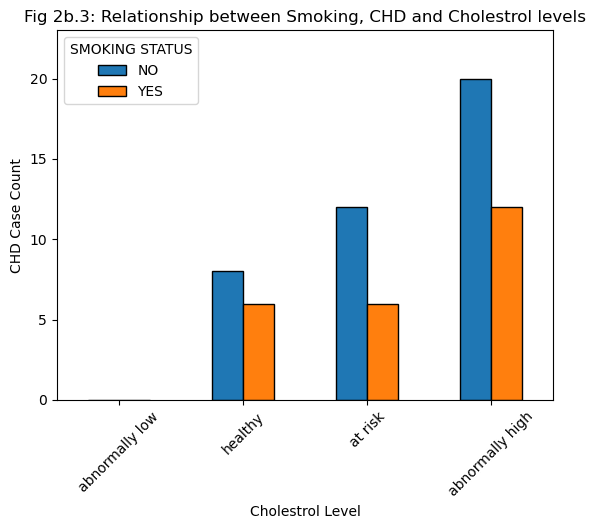

In [60]:
# Plot Smoking Status in Relation to Cholestrol Level for participants with CHD

chol_smoking_pivot.plot(kind='bar',xlabel='Cholestrol Level',label='Smoking Status',stacked=False,
                         rot=45,ylabel='CHD Case Count',title='Fig 2b.3: Relationship between Smoking, CHD and Cholestrol levels',
                         edgecolor ='black')

plt.ylim(0,23)
plt.show()

Findings: Smoking status does not display a positive relationship with CHD and Cholesterol in Period 1, as majority of non-smokers
tend to have 'at risk' to 'abnormally high' levels of cholesterol.

Analysis for CHD, CHOLESTROL AND SMOKING in PERIOD 3

In [61]:
# Filter by Period 3 only this time 

chol_p3 = chol_df.loc[chol_df['PERIOD']==3,:]

# Filter again by PREVALENT CHD=='YES'

chol_p3_yes = chol_p3.loc[chol_p3['PREVALENT CHD']=='YES',:]

# Filtering by PREVALENT CHD == 'NO' for later use
chol_p3_no = chol_p3.loc[chol_p3['PREVALENT CHD']=='NO',:]

In [62]:
# Creating pivot table for cleaner analysis between CHD, Cholestrol and Smoking status

chol_smoking_table3 = pd.DataFrame()
chol_smoking_table3 = chol_p3_yes.groupby(['SMOKING STATUS','CHOLESTROL LEVEL'])['PREVALENT CHD'].count()

# Reset index to convert it to a table, from a Series
chol_smoking_table3 = chol_smoking_table3.reset_index() 
chol_smoking_table3

# Create Pivot Table with above
chol_smoking_pivot3 = chol_smoking_table3.pivot(index = 'CHOLESTROL LEVEL', columns='SMOKING STATUS',values='PREVALENT CHD')
chol_smoking_pivot3

SMOKING STATUS,NO,YES
CHOLESTROL LEVEL,,
abnormally low,0,0
healthy,37,23
at risk,72,27
abnormally high,110,31


Plotting a line graph of Period 3 only due to interesting finding of increased CHD count in Period 3 for better analysis

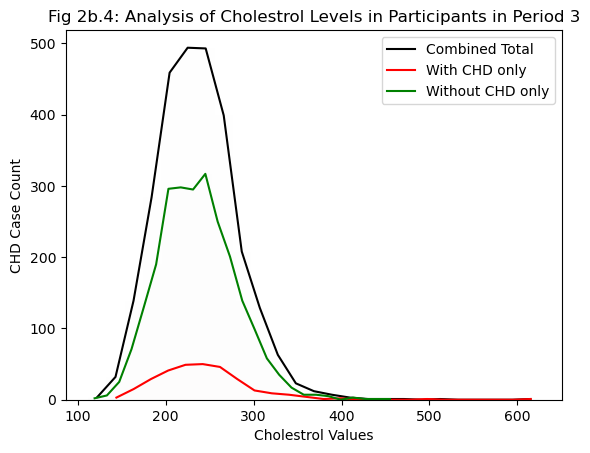

In [63]:
cholestrol_df = pd.DataFrame()
cholestrol_df = chol_p3[['ID','TOTAL CHOLESTROL','PREVALENT CHD']]
cholestrol_df

counts, bin_middles,_=plt.hist(cholestrol_df['TOTAL CHOLESTROL'],bins=25,alpha=0.005)
bin_widths=bin_middles[1:]-bin_middles[:-1]
bin_centers = bin_middles[:-1]+bin_widths/2
plt.plot(bin_centers,counts,'black',label = 'Combined Total')

counts_withchdonly, bin_middles2,_=plt.hist(chol_p3_yes['TOTAL CHOLESTROL'],bins=25,alpha=0.005)
bin_widths2=bin_middles2[1:]-bin_middles2[:-1]
bin_centers2= bin_middles2[:-1]+bin_widths2/2
plt.plot(bin_centers2,counts_withchdonly,'r',label = 'With CHD only')

counts_without, bin_middles3,_=plt.hist(chol_p3_no['TOTAL CHOLESTROL'],bins=25,alpha=0.005)
bin_widths3=bin_middles3[1:]-bin_middles3[:-1]
bin_centers3= bin_middles3[:-1]+bin_widths3/2
plt.plot(bin_centers3,counts_without,'g',label = 'Without CHD only')

plt.xlabel('Cholestrol Values')
plt.ylabel('CHD Case Count')
plt.title('Fig 2b.4: Analysis of Cholestrol Levels in Participants in Period 3')
plt.legend()
plt.show()

Statistical Testing using quartiles, IQR and outliers for CHD participants' cholesterol values for better clarity of any correlation for Period 3

In [64]:
# POTENTIAL OUTLIERS USING QUARTILES, IQR ETC in CHOLESTROL TOTAL'S (inclusive +CHD)
# due to the interesting finding in period 3, we are looking for outliers in this period only
quartiles = chol_p3_yes['TOTAL CHOLESTROL'].quantile([0.25,0.5,0.75])

lowerquart = quartiles[0.25]
upperquart = quartiles[0.75]
median = quartiles[0.5]
iqr = upperquart - lowerquart

print(f' The lower quartile of cholestrol distribution in participants with CHD is {lowerquart}')
print(f' The upper quartile of cholestrol distribution in participants with CHD is {upperquart}')
print(f' The median value of cholestrol distribution in participants with CHD is {lowerquart}')

lowerbound_cholestrol = lowerquart - 1.5*iqr
upperbound_cholestrol = upperquart + 1.5*iqr

print(f'The lowerbound zone of cholestrol distribution in participants with CHD is {lowerbound_cholestrol}')
print(f'The upperbound zone of cholestrol distribution in participants with CHD is {upperbound_cholestrol}')

 The lower quartile of cholestrol distribution in participants with CHD is 208.0
 The upper quartile of cholestrol distribution in participants with CHD is 268.0
 The median value of cholestrol distribution in participants with CHD is 208.0
The lowerbound zone of cholestrol distribution in participants with CHD is 118.0
The upperbound zone of cholestrol distribution in participants with CHD is 358.0


In [65]:
# Finding where outliers may exist.

outlier_cholestrol = chol_p3_yes.loc[(chol_p3_yes['TOTAL CHOLESTROL'] < lowerbound_cholestrol) | (chol_p3_yes['TOTAL CHOLESTROL'] > upperbound_cholestrol)].reset_index()
print(f' The outliers that exist are the following values:')
outlier_cholestrol

 The outliers that exist are the following values:


,index,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,SMOKING STATUS,CIGS PER DAY,PERIOD,CHOLESTROL LEVEL
0,359,482553,F,504.0,YES,NO,0,3,abnormally high
1,1001,1189726,F,625.0,YES,NO,0,3,abnormally high
2,1076,1287993,F,366.0,YES,NO,0,3,abnormally high
3,3053,3676172,M,360.0,YES,YES,20,3,abnormally high
4,5114,6255031,F,361.0,YES,NO,0,3,abnormally high
5,5339,6521946,F,378.0,YES,NO,0,3,abnormally high
6,5744,6992976,F,396.0,YES,NO,0,3,abnormally high
7,7538,9115104,F,390.0,YES,NO,0,3,abnormally high


# Boxplotting Period 3 data of TOTAL CHOLESTEROL among population sample

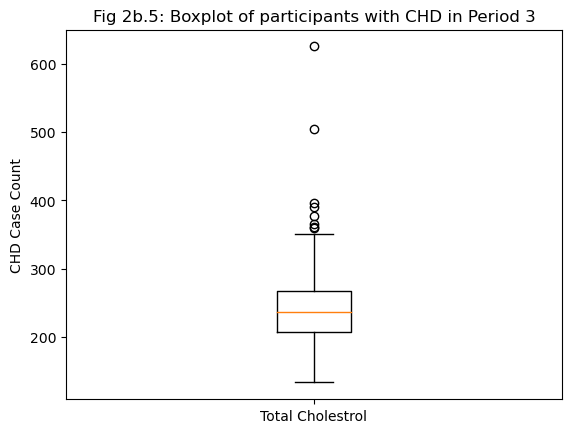

In [66]:
# Boxplotting Period 3 data of TOTAL CHOLESTEROL among population sample

plt.boxplot(chol_p3_yes['TOTAL CHOLESTROL'], labels=['Total Cholestrol'])
plt.title('Fig 2b.5: Boxplot of participants with CHD in Period 3')
plt.ylabel('CHD Case Count')
plt.show()

Findings: All the outliers (total 8) have 'abnormally high' cholesterol levels, whilst no outliers under the lowerbound range.

# Section 3: BMI v CHD

In [67]:
# Read into the clean_data csv
bmi_df = pd.read_csv('csv/clean_data.csv')
bmi_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [68]:
# Convert Prevalent CHD to integer64 
bmi_df['PREVALENT CHD'] = np.where(bmi_df['PREVALENT CHD'] == 'YES', 1, 0)

bmi_df['PREVALENT CHD'] = bmi_df['PREVALENT CHD'].astype('int64')
bmi_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,0,1,28.73
1,6238,F,260.0,52,NO,0,2,0,2,29.43
2,6238,F,237.0,58,NO,0,2,0,3,28.50
3,11263,F,228.0,43,NO,0,2,0,1,30.30
4,11263,F,230.0,49,NO,0,2,0,2,31.36


In [69]:
# calculting the max value of BMI
max_bmi = bmi_df['BMI'].max()
max_bmi

56.8

In [70]:
# Establishing bins for BMI 
bins = [0, 18.5, 24.9, 29.9, max_bmi]
labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]

In [71]:
# Categorizing BMI into the esbalished bins 
bmi_df["BMI CATEGORY"] = pd.cut(bmi_df["BMI"], bins, labels= labels)
bmi_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
0,6238,F,250.0,46,NO,0,2,0,1,28.73,Overweight
1,6238,F,260.0,52,NO,0,2,0,2,29.43,Overweight
2,6238,F,237.0,58,NO,0,2,0,3,28.50,Overweight
3,11263,F,228.0,43,NO,0,2,0,1,30.30,Obesity
4,11263,F,230.0,49,NO,0,2,0,2,31.36,Obesity


Analysis for Period 1 

In [72]:
# Create new DataFrame for Period 1 only 
bmiP1_df = bmi_df [bmi_df['PERIOD']==1]
bmiP1_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
0,6238,F,250.0,46,NO,0,2,0,1,28.73,Overweight
3,11263,F,228.0,43,NO,0,2,0,1,30.30,Obesity
6,14367,M,260.0,52,NO,0,1,0,1,26.36,Overweight
9,16365,M,225.0,43,YES,30,1,0,1,23.61,Healthy Weight
12,23727,F,332.0,41,NO,0,3,0,1,31.31,Obesity


In [73]:
# Descriptive stats on Period 1 
describe = bmiP1_df[['SEX','SMOKING STATUS', 'EDUCATION', 'PREVALENT CHD', 'BMI CATEGORY']]
for col in describe:
    print(describe[col].value_counts())

SEX
F    1546
M    1208
Name: count, dtype: int64
SMOKING STATUS
NO     1455
YES    1299
Name: count, dtype: int64
EDUCATION
1    1103
2     848
3     461
4     342
Name: count, dtype: int64
PREVALENT CHD
0    2690
1      64
Name: count, dtype: int64
BMI CATEGORY
Healthy Weight    1230
Overweight        1168
Obesity            320
Underweight         36
Name: count, dtype: int64


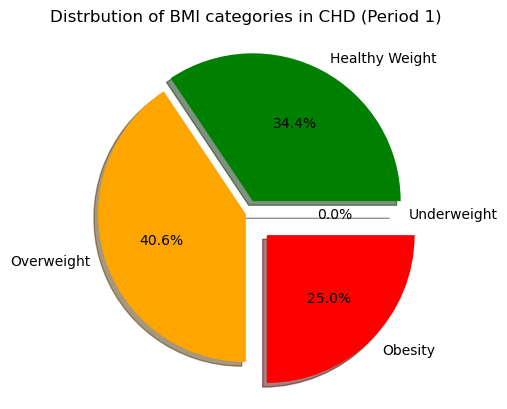

In [74]:
# Creating the groupby BMI category:
grouped1_df = bmiP1_df.groupby(['BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()

# Creating a pie chart
explode = (0, 0.1, 0, 0.2)
colors = ['grey', 'green', 'orange', 'red']

plt.pie(grouped1_df['PREVALENT CHD'], explode = explode, labels= grouped1_df['BMI CATEGORY'], 
        colors= colors, autopct="%1.1f%%", shadow= True)
plt.title('Distrbution of BMI categories in CHD (Period 1)')
plt.show()

Analyzing the trend of BMI category vs CHD in smokers vs non-smokers in Period 1 

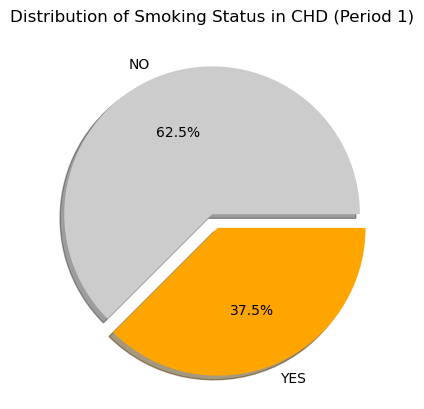

In [75]:
# Creating a grouby table by BMI and SMOKING STATUS
groupedP1_df = bmiP1_df.groupby(['SMOKING STATUS'])['PREVALENT CHD'].sum().reset_index()
groupedP1_df

# Creating a pie chart
explode = (0, 0.1)
colors = ['0.80', 'orange']


plt.pie(groupedP1_df['PREVALENT CHD'], labels= groupedP1_df['SMOKING STATUS'], explode= explode,
        colors= colors, shadow= True, autopct="%1.1f%%" )
plt.title('Distribution of Smoking Status in CHD (Period 1)')
plt.show()

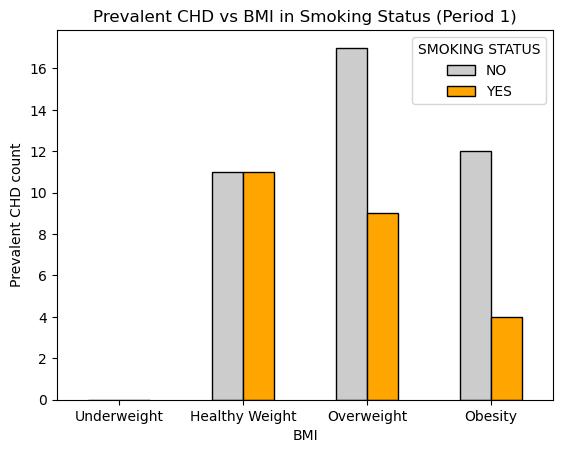

In [76]:
# Creating a grouby table by BMI and SMOKING STATUS
groupedP1_df = bmiP1_df.groupby(['SMOKING STATUS', 'BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
groupedP1_df

# Pivot the SMOKING STATUS column, set BMI as index 
pivotP1_df = groupedP1_df.pivot(index = 'BMI CATEGORY', columns = 'SMOKING STATUS', values= 'PREVALENT CHD')
pivotP1_df

# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde smokers and non-smokers 
pivotP1_df.plot(kind='bar', 
                color= ('0.80', 'orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI in Smoking Status (Period 1)')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

Analyzing the trend of BMI category vs CHD in males vs females in Period 1 

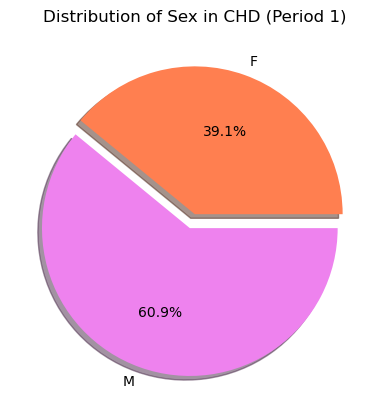

In [77]:
# Creating a grouby by SEX and BMI
groupedS1_df = bmiP1_df.groupby(['SEX'])['PREVALENT CHD'].sum().reset_index()
groupedS1_df

# Creating a pie chart
explode = (0, 0.1)
colors = ['coral', 'violet']


plt.pie(groupedS1_df['PREVALENT CHD'], labels= groupedS1_df['SEX'], explode= explode,
        colors= colors, shadow= True, autopct="%1.1f%%" )
plt.title('Distribution of Sex in CHD (Period 1)')
plt.show()

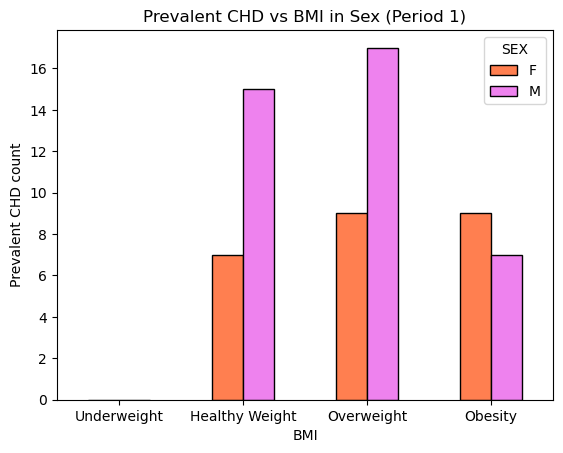

In [78]:
# Creating a grouby by SEX and BMI
groupedS1_df = bmiP1_df.groupby(['SEX', 'BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
groupedS1_df

# Pivot the SMOKING STATUS column, set BMI as index 
pivotS1_df = groupedS1_df.pivot(index = 'BMI CATEGORY', columns = 'SEX', values= 'PREVALENT CHD')
pivotS1_df

# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde males and females 
pivotS1_df.plot(kind='bar',
                color= ('coral', 'violet'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI in Sex (Period 1)')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

Analysis for Period 3

In [79]:
# Create new DataFrame for Period 3 only 
bmiP3_df = bmi_df [bmi_df['PERIOD']==3]
bmiP3_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
2,6238,F,237.0,58,NO,0,2,0,3,28.50,Overweight
5,11263,F,220.0,55,NO,0,2,0,3,31.17,Obesity
8,14367,M,280.0,64,NO,0,1,0,3,25.72,Overweight
11,16365,M,211.0,55,NO,0,1,0,3,29.11,Overweight
14,23727,F,159.0,53,NO,0,3,0,3,26.62,Overweight


In [80]:
# Descriptive stats on Period 3
describe = bmiP3_df[['SEX','SMOKING STATUS', 'EDUCATION', 'PREVALENT CHD', 'BMI CATEGORY']]
for col in describe:
    print(describe[col].value_counts())

SEX
F    1546
M    1208
Name: count, dtype: int64
SMOKING STATUS
NO     1820
YES     934
Name: count, dtype: int64
EDUCATION
1    1103
2     848
3     461
4     342
Name: count, dtype: int64
PREVALENT CHD
0    2454
1     300
Name: count, dtype: int64
BMI CATEGORY
Healthy Weight    1175
Overweight        1167
Obesity            370
Underweight         42
Name: count, dtype: int64


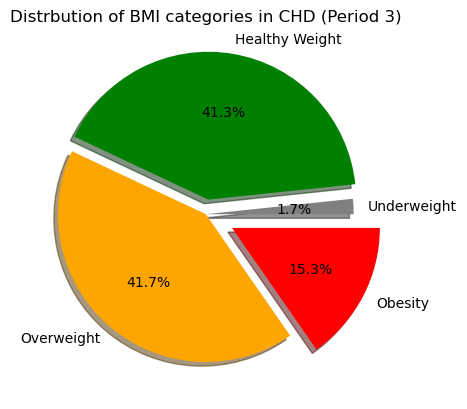

In [81]:
# Creating the groupby BMI category:
grouped2_df = bmiP3_df.groupby(['BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()

# Creating a pie chart
explode = (0, 0.1, 0, 0.2)
colors = ['grey', 'green', 'orange', 'red']

plt.pie(grouped2_df['PREVALENT CHD'], explode = explode, labels= grouped2_df['BMI CATEGORY'], 
        colors= colors, autopct="%1.1f%%", shadow= True)
plt.title('Distrbution of BMI categories in CHD (Period 3)')
plt.show()

Analyzing the trend of BMI category vs CHD in smokers vs non-smokers in Period 3 

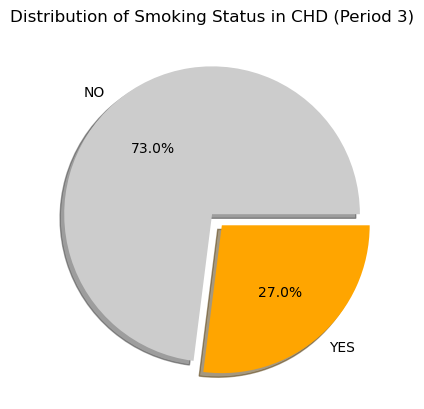

In [82]:
# Creating a grouby table by BMI and SMOKING STATUS
groupedP3_df = bmiP3_df.groupby(['SMOKING STATUS'])['PREVALENT CHD'].sum().reset_index()

# Creating a pie chart
explode = (0, 0.1)
colors = ['0.80', 'orange']


plt.pie(groupedP3_df['PREVALENT CHD'], labels= groupedP3_df['SMOKING STATUS'], explode= explode,
        colors= colors, shadow= True, autopct="%1.1f%%" )
plt.title('Distribution of Smoking Status in CHD (Period 3)')
plt.show()

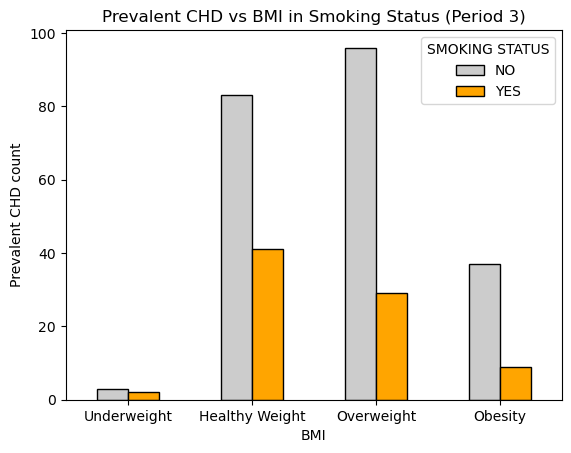

In [83]:
# Creating a grouby by SMOKING STATUS and BMI
groupedP3_df = bmiP3_df.groupby(['SMOKING STATUS', 'BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
groupedP3_df

# Pivot the SMOKING STATUS column, set BMI as index 
pivotP3_df = groupedP3_df.pivot(index = 'BMI CATEGORY', columns = 'SMOKING STATUS', values= 'PREVALENT CHD')
pivotP3_df

# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde smokers and non-smokers 
pivotP3_df.plot(kind='bar',
                color= ('0.80', 'orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI in Smoking Status (Period 3)')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

Analyzing the trend of BMI category vs CHD in males vs females in Period 3 

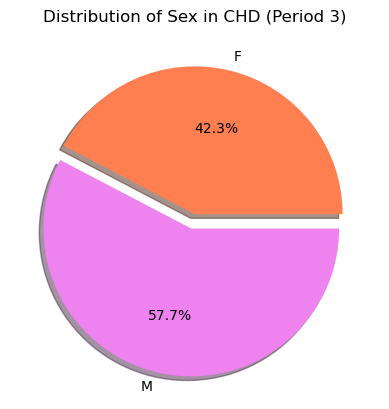

In [84]:
# Creating a grouby by SEX and BMI
groupedS3_df = bmiP3_df.groupby(['SEX'])['PREVALENT CHD'].sum().reset_index()

# Creating a pie chart
explode = (0, 0.1)
colors = ['coral', 'violet']


plt.pie(groupedS3_df['PREVALENT CHD'], labels= groupedS3_df['SEX'], explode= explode,
        colors= colors, shadow= True, autopct="%1.1f%%" )
plt.title('Distribution of Sex in CHD (Period 3)')
plt.show()

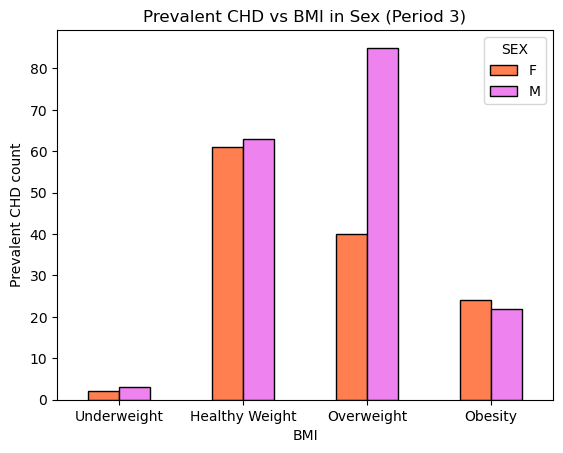

In [85]:
# Analyzing the trend of BMI vs CHD in males vs females 
#

# Creating a grouby by SEX and BMI
groupedS3_df = bmiP3_df.groupby(['SEX', 'BMI CATEGORY'])['PREVALENT CHD'].sum().reset_index()
groupedS3_df

# Pivot the SMOKING STATUS column, set BMI as index 
pivotS3_df = groupedS3_df.pivot(index = 'BMI CATEGORY', columns = 'SEX', values= 'PREVALENT CHD')
pivotS3_df

# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde males and females 
pivotS3_df.plot(kind='bar', 
                color= ('coral', 'violet'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs BMI in Sex (Period 3)')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()